In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
import scikitplot as skplt
#from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
train = pd.read_csv('Data/NSL-KDD-Dataset/KDDTrain+.txt',header=None)

In [5]:
train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [6]:
test = pd.read_csv('Data/NSL-KDD-Dataset/KDDTest+.txt',header=None)

In [7]:
test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [8]:
df = pd.concat([train,test])
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [9]:
df = df.reset_index()

In [10]:
df

,index,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,1,0,udp,other,SF,146,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,3,0,tcp,http,SF,232,8153,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,4,0,tcp,http,SF,199,420,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,5,0,tcp,private,REJ,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,6,0,tcp,private,S0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,7,0,tcp,private,S0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,8,0,tcp,remote_job,S0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,9,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [11]:
df = df.drop(['index'],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [12]:

scalar = StandardScaler()

In [13]:
X = df.iloc[:,0:41]

In [14]:
X

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,tcp,private,REJ,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,tcp,private,S0,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,tcp,private,S0,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,tcp,private,S0,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [15]:
Y = df.iloc[:,-2]

In [16]:
Y

0               normal
1               normal
2              neptune
3               normal
4               normal
5              neptune
6              neptune
7              neptune
8              neptune
9              neptune
10             neptune
11             neptune
12              normal
13         warezclient
14             neptune
15             neptune
16              normal
17             ipsweep
18              normal
19              normal
20             neptune
21             neptune
22              normal
23              normal
24             neptune
25              normal
26             neptune
27              normal
28              normal
29              normal
              ...     
148487          normal
148488         apache2
148489          normal
148490    processtable
148491          normal
148492    processtable
148493           satan
148494           satan
148495            back
148496          normal
148497         rootkit
148498         apache2
148499     

In [17]:
X[1].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [18]:
X[1].unique()
x = {'tcp':0,'udp':1,'icmp':2}
X[1] = X[1].map(x)

In [19]:
X

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,private,REJ,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,0,private,S0,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,0,private,S0,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,0,remote_job,S0,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,0,private,S0,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [20]:
X[2].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [21]:
x = {'ftp_data':0, 'other':1, 'private':2, 'http':3, 'remote_job':4, 'name':5,
       'netbios_ns':6, 'eco_i':7, 'mtp':8, 'telnet':9, 'finger':10, 'domain_u':11,
       'supdup':12, 'uucp_path':13, 'Z39_50':14, 'smtp':15, 'csnet_ns':16, 'uucp':17,
       'netbios_dgm':18, 'urp_i':19, 'auth':20, 'domain':21, 'ftp':22, 'bgp':23, 'ldap':24,
       'ecr_i':25, 'gopher':26, 'vmnet':27, 'systat':28, 'http_443':29, 'efs':30, 'whois':31,
       'imap4':32, 'iso_tsap':33, 'echo':34, 'klogin':35, 'link':36, 'sunrpc':37, 'login':38,
       'kshell':39, 'sql_net':40, 'time':41, 'hostnames':42, 'exec':43, 'ntp_u':44,
       'discard':45, 'nntp':46, 'courier':47, 'ctf':48, 'ssh':49, 'daytime':50, 'shell':51,
       'netstat':52, 'pop_3':53, 'nnsp':54, 'IRC':55, 'pop_2':56, 'printer':57, 'tim_i':58,
       'pm_dump':59, 'red_i':60, 'netbios_ssn':61, 'rje':62, 'X11':63, 'urh_i':64,
       'http_8001':65, 'aol':66, 'http_2784':67, 'tftp_u':68, 'harvest':69}

In [22]:
X[2] = X[2].map(x)
#X_test[2] = X_test[2].map(x)
X

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,1,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,2,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,3,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,3,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,2,REJ,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,0,2,S0,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,0,2,S0,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,0,4,S0,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,0,2,S0,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [23]:
X[3].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [24]:
x = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'SH':4, 'RSTO':5, 'S1':6, 'RSTOS0':7, 'S3':8,
       'S2':9, 'OTH':10}
X[3] = X[3].map(x)
#X_test[3] = X_test[3].map(x)
X

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,1,0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,2,1,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,3,0,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,3,0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,2,2,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,0,2,1,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,0,2,1,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,0,4,1,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,0,2,1,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [25]:
scalar = StandardScaler()

In [26]:
scaled_X = scalar.fit_transform(X)

In [27]:
pd.DataFrame(scaled_X)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.112481,-0.438547,-0.780461,-0.589427,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.344349,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815
1,-0.112481,1.356605,-0.703081,-0.589427,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815
2,-0.112481,-0.438547,-0.625702,0.317121,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815
3,-0.112481,-0.438547,-0.548323,-0.589427,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.562277,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989
4,-0.112481,-0.438547,-0.548323,-0.589427,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815
5,-0.112481,-0.438547,-0.625702,1.223669,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-0.903182,-1.036738,-0.072658,-0.472829,-0.280650,-0.597720,-0.584813,2.676395,2.575756
6,-0.112481,-0.438547,-0.625702,0.317121,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-0.993084,-1.103694,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815
7,-0.112481,-0.438547,-0.625702,0.317121,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-0.939143,-1.059057,-0.072658,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815
8,-0.112481,-0.438547,-0.470943,0.317121,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-0.867221,-0.992101,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815
9,-0.112481,-0.438547,-0.625702,0.317121,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,0.721338,-0.957123,-1.081375,-0.124178,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815


# Map the Y variable into integers like X[1],X[2],X[3] mailbomb couldnot found

In [28]:
Y.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [29]:
x = {'normal':0, 'neptune':1, 'warezclient':3, 'ipsweep':2, 'portsweep':2,
       'teardrop':1, 'nmap':2, 'satan':2, 'smurf':1, 'pod':1, 'back':1,
       'guess_passwd':3, 'ftp_write':3, 'multihop':3, 'rootkit':4,
       'buffer_overflow':4, 'imap':3, 'warezmaster':3, 'phf':3, 'land':1,
       'loadmodule':4, 'spy':3, 'perl':4, 'saint':2, 'mscan':2, 'apache2':1,
       'snmpgetattack':3, 'processtable':1, 'httptunnel':3, 'ps':4, 'snmpguess':3,
       'mailbomb':3, 'named':3, 'sendmail':3, 'xterm':4, 'worm':1, 'xlock':3,
       'xsnoop':3, 'sqlattack':4, 'udpstorm':1}
Y = Y.map(x)
Y

0         0
1         0
2         1
3         0
4         0
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        0
13        3
14        1
15        1
16        0
17        2
18        0
19        0
20        1
21        1
22        0
23        0
24        1
25        0
26        1
27        0
28        0
29        0
         ..
148487    0
148488    1
148489    0
148490    1
148491    0
148492    1
148493    2
148494    2
148495    1
148496    0
148497    4
148498    1
148499    0
148500    0
148501    1
148502    0
148503    1
148504    1
148505    0
148506    0
148507    1
148508    0
148509    1
148510    3
148511    1
148512    0
148513    0
148514    1
148515    0
148516    2
Name: 41, Length: 148517, dtype: int64

In [30]:
Y.value_counts()

0    77054
1    53094
2    14077
3     4173
4      119
Name: 41, dtype: int64

In [31]:
ratio = {0:2500,1:2500,2:2500,3:2500}
undersample = RandomUnderSampler(ratio=ratio)
X_ran_sam,Y_ran_sam = undersample.fit_resample(X,Y)

In [32]:
pd.DataFrame(Y_ran_sam)[0].value_counts()

3    2500
2    2500
1    2500
0    2500
4     119
Name: 0, dtype: int64

In [33]:
'''ratio = {4:2500}
oversample = RandomOverSampler(ratio=ratio)
X_ran_sam,y_ran_sam = oversample.fit_resample(X,Y)
pd.DataFrame(y_ran_sam)[0].value_counts()
'''


'ratio = {4:2500}\noversample = RandomOverSampler(ratio=ratio)\nX_ran_sam,y_ran_sam = oversample.fit_resample(X,Y)\npd.DataFrame(y_ran_sam)[0].value_counts()\n'

In [34]:
X_resampled, y_resampled = SMOTE().fit_resample(X_ran_sam, Y_ran_sam)

In [35]:
pd.DataFrame(y_resampled)[0].value_counts()

4    2500
3    2500
2    2500
1    2500
0    2500
Name: 0, dtype: int64

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=111)

In [37]:
pd.DataFrame(Y_test)[0].value_counts()

2    772
3    757
0    753
4    746
1    722
Name: 0, dtype: int64

In [38]:
clf = LogisticRegression() 
# logistic regression e training r testion 61% r 59% disi

In [39]:
clf.fit(X_train,Y_train)

C:\Users\binit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\binit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_predict = clf.predict(X_test)
train_predict = clf.predict(X_train)
print(classification_report(Y_train,train_predict))#predict/predict_classes

              precision    recall  f1-score   support

           0       0.49      0.76      0.60      1747
           1       0.58      0.91      0.71      1778
           2       0.26      0.07      0.11      1728
           3       0.56      0.58      0.57      1743
           4       0.91      0.53      0.67      1754

    accuracy                           0.57      8750
   macro avg       0.56      0.57      0.53      8750
weighted avg       0.56      0.57      0.53      8750



In [195]:
metrics.confusion_matrix(Y_test,y_predict)


array([[569,  35,  12, 136,   1],
       [ 44, 665,   3,  10,   0],
       [234, 399,  56,  83,   0],
       [270,  15,  37, 433,   2],
       [ 77,  12,  60, 496, 101]], dtype=int64)

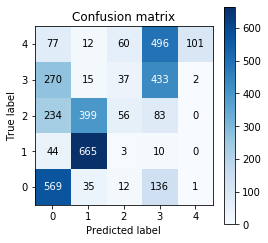

In [199]:
# CONFUSION MATRIX
fig3 = skplt.metrics.plot_confusion_matrix(Y_test,y_predict,figsize=(4,4),title="Confusion matrix")
plt.ylim(-0.5, 4.5)
plt.show()

In [40]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.77      0.61       753
           1       0.58      0.94      0.72       722
           2       0.38      0.07      0.11       772
           3       0.37      0.59      0.45       757
           4       0.99      0.13      0.22       746

    accuracy                           0.49      3750
   macro avg       0.56      0.50      0.42      3750
weighted avg       0.56      0.49      0.42      3750



In [201]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=111)

In [202]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random')

In [203]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [204]:
y_predict = clf.predict(X_test)
train_predict = clf.predict(X_train)
print(classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00      1778
           2       1.00      1.00      1.00      1728
           3       1.00      1.00      1.00      1743
           4       1.00      1.00      1.00      1754

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [205]:
metrics.confusion_matrix(Y_test,y_predict)

array([[721,   2,   4,  22,   4],
       [  5, 712,   5,   0,   0],
       [ 15,   2, 749,   6,   0],
       [ 11,   0,   1, 735,  10],
       [  4,   0,   0,   3, 739]], dtype=int64)

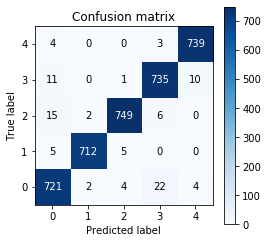

In [206]:
# CONFUSION MATRIX
fig3 = skplt.metrics.plot_confusion_matrix(Y_test,y_predict,figsize=(4,4),title="Confusion matrix")
plt.ylim(-0.5, 4.5)
plt.show()

In [ ]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score (Y_test,)

In [46]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       753
           1       0.99      1.00      0.99       722
           2       0.98      0.99      0.98       772
           3       0.96      0.98      0.97       757
           4       0.99      0.99      0.99       746

    accuracy                           0.98      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.98      0.98      0.98      3750



In [224]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=111)

In [225]:
clf_knn = KNeighborsClassifier()

In [226]:
clf_knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [227]:
y_predict = clf_knn.predict(X_test)
train_predict = clf.predict(X_train)
print(classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00      1778
           2       1.00      1.00      1.00      1728
           3       1.00      1.00      1.00      1743
           4       1.00      1.00      1.00      1754

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [228]:
metrics.confusion_matrix(Y_test,y_predict)

array([[659,   7,  27,  21,  39],
       [  3, 680,  37,   2,   0],
       [  6,  24, 731,   8,   3],
       [ 13,   1,   3, 728,  12],
       [ 26,   1,   1,   5, 713]], dtype=int64)

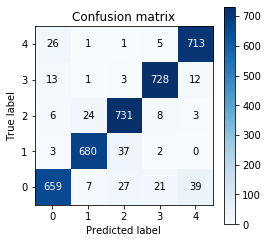

In [229]:
# CONFUSION MATRIX
fig3 = skplt.metrics.plot_confusion_matrix(Y_test,y_predict,figsize=(4,4),title="Confusion matrix")
plt.ylim(-0.5, 4.5)
plt.show()

In [230]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       753
           1       0.95      0.94      0.95       722
           2       0.91      0.95      0.93       772
           3       0.95      0.96      0.96       757
           4       0.93      0.96      0.94       746

    accuracy                           0.94      3750
   macro avg       0.94      0.94      0.94      3750
weighted avg       0.94      0.94      0.94      3750



In [231]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=111)
clf_rf = RandomForestClassifier(criterion='gini')
clf_rf.fit(X_train,Y_train)


C:\Users\binit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [232]:
y_predict = clf_rf.predict(X_test)
train_predict = clf.predict(X_train)
print(classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00      1778
           2       1.00      1.00      1.00      1728
           3       1.00      1.00      1.00      1743
           4       1.00      1.00      1.00      1754

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [233]:
metrics.confusion_matrix(Y_test,y_predict)

array([[737,   1,   2,  10,   3],
       [  3, 717,   2,   0,   0],
       [  8,   1, 761,   2,   0],
       [ 10,   0,   1, 739,   7],
       [  1,   0,   0,   2, 743]], dtype=int64)

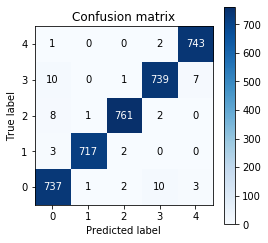

In [234]:
# CONFUSION MATRIX
fig3 = skplt.metrics.plot_confusion_matrix(Y_test,y_predict,figsize=(4,4),title="Confusion matrix")
plt.ylim(-0.5, 4.5)
plt.show()

In [235]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       753
           1       1.00      0.99      1.00       722
           2       0.99      0.99      0.99       772
           3       0.98      0.98      0.98       757
           4       0.99      1.00      0.99       746

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



In [236]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=111)

In [237]:
clf_nv = GaussianNB()

In [238]:
Y_train.shape

(8750,)

In [239]:
clf_nv.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [240]:
y_predict = clf_nv.predict(X_test)
train_predict = clf.predict(X_train)
print(classification_report(Y_train,train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00      1778
           2       1.00      1.00      1.00      1728
           3       1.00      1.00      1.00      1743
           4       1.00      1.00      1.00      1754

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [241]:
metrics.confusion_matrix(Y_test,y_predict)

array([[  4, 610,   8,   5, 126],
       [  1, 690,   6,   0,  25],
       [  6, 713,  53,   0,   0],
       [ 40, 688,  21,   3,   5],
       [ 24, 401,   0,   8, 313]], dtype=int64)

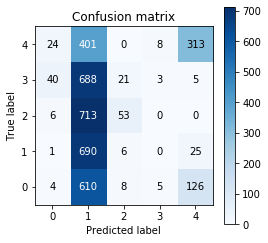

In [242]:
# CONFUSION MATRIX
fig3 = skplt.metrics.plot_confusion_matrix(Y_test,y_predict,figsize=(4,4),title="Confusion matrix")
plt.ylim(-0.5, 4.5)
plt.show()

In [243]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.05      0.01      0.01       753
           1       0.22      0.96      0.36       722
           2       0.60      0.07      0.12       772
           3       0.19      0.00      0.01       757
           4       0.67      0.42      0.52       746

    accuracy                           0.28      3750
   macro avg       0.35      0.29      0.20      3750
weighted avg       0.35      0.28      0.20      3750

